# Customer Segmentation analysis
### Overview:
- During the Analysis Approach phase, using Python and Google Colab, I explored and cleaned the data in the **"CustomerDemographic"** and **"CustomerAddress"** sheets.

- By examining and processing missing values, null values, duplicates, and data inconsistency, I created the correct data set and prepared it for the next steps of analysis in the Customer Segmentation Analysis project.

- Perform the merge process of two DataFrames based on the primary keys (PK) column **"customer_id"** Save the result of the merge into the file **"CustomerDemographic_Clean.csv"** to update the cleaned data from the **"CustomerAddress"** sheet.


## Customer Demographic

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Loading the Customer Demographics Data from the excel file
cust_demo = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')

<ipython-input-2-4c6004484d85>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_demo = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')


In [3]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [4]:
# Information of columns and data-types of Customer Demographics Data.
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [5]:
print("Total records (rows) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 12


### Numeric Columns and Non-Numeric Columns

In [6]:
# select numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car']


### Missing Values Check

#### Overview about missing values

In [7]:
# Total number of missing values
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [8]:
#Percentage of missing values
cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Here the columns show the percentage of missing values from high to low, including columns such as:
- job_industry_category (16.4%)
- job_title (12.65%)
- last_name (3.125%)
- DOB & tenure (2.175%)

###

#### 1: job_industry_category

In [9]:
cust_demo[cust_demo['job_industry_category'].isnull()].head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0


In [10]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [11]:
cust_demo['job_industry_category'].isnull().sum()

0

#### 2: job_tiltle

In [12]:
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0


In [13]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

In [14]:
cust_demo['job_title'].isnull().sum()

0

#### 3: last_name

In [15]:
cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()


first_name     0
customer_id    0
dtype: int64

In [16]:
cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,Missing,Missing,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17,Missing,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [17]:
cust_demo['last_name'].fillna('None',axis=0, inplace=True)

In [18]:
cust_demo['last_name'].isnull().sum()

0

#### 4: DOB

In [19]:
cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,Missing,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,Missing,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,Missing,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,Missing,IT,High Net Worth,N,Yes,NaN


In [20]:
round(cust_demo['DOB'].isnull().mean()*100)

2

In [21]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [22]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)

In [23]:
cust_demo['DOB'].isnull().sum()

0

In [24]:
# Function to calculate the age as of today based on the DOB of the customer.

def age(born):
    today = date.today()

    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_demo['Age'] = cust_demo['DOB'].apply(age)

<ipython-input-25-e8330b2a7048>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_demo['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

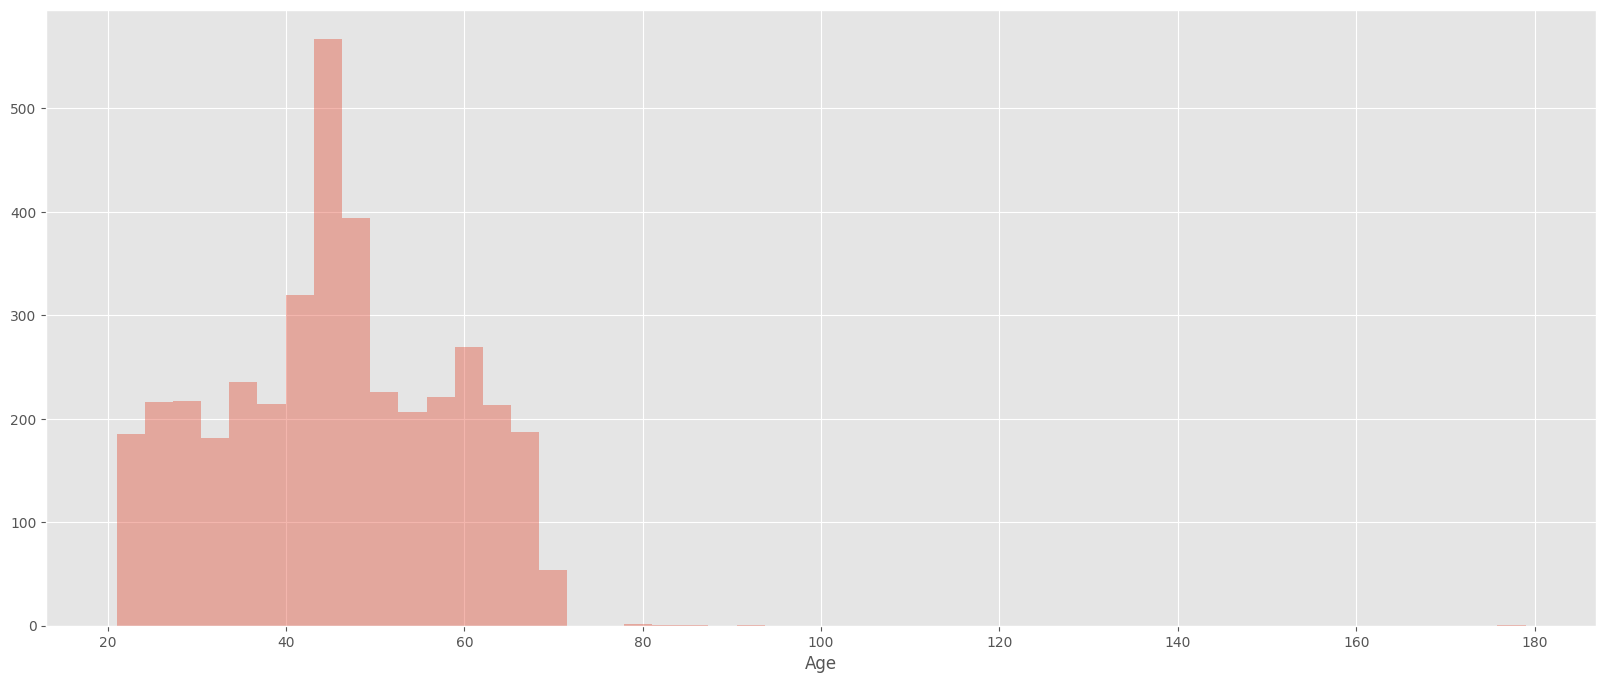

In [25]:
# Viz to find out the Age Distribution
plt.figure(figsize=(20,8))
sns.distplot(cust_demo['Age'], kde=False, bins=50)

In [26]:
cust_demo['Age'].describe()

count    3913.000000
mean       45.534884
std        12.801891
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       179.000000
Name: Age, dtype: float64

nhận thấy có khách hàng có độ tuổi 179. Rõ ràng đây là trường hợp ngoại lệ vì phân vị thứ 75 của Độ tuổi là 55.

In [27]:
cust_demo[cust_demo['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,179


In [28]:
age_index_drop = cust_demo[cust_demo['Age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

When the Date of Birth is Null, tenure is also Null. Therefore, null terms are also removed after removing null DOBs from the data frame.


In [29]:
cust_demo['tenure'].isnull().sum()

0

### Finally, Check if the entire dataset is missing or null values

In [30]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [31]:
print("Total records after removing Missing Values: {}".format(cust_demo.shape[0]))

Total records after removing Missing Values: 3912


### Check the inconsistency of the data
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

#### 1: gender

In [32]:
cust_demo['gender'].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

Ở đây có dữ liệu không nhất quán trong cột giới tính. Có lỗi chính tả và lỗi chính tả. Đối với giới tính có giá trị M sẽ được thay thế bằng Male, F sẽ được thay thế bằng Female và Femal sẽ được thay thế bằng Female

In [33]:
def replace_gender_names (gender):
  if gender == 'M':
    return 'Male'
  elif gender == 'F':
    return 'Female'
  elif gender == 'Femal':
    return "Female"
  else:
    return gender

cust_demo['gender']= cust_demo['gender'].apply(replace_gender_names)

In [34]:
cust_demo['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

#### 2: wealth_segment

In [35]:
cust_demo['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

#### 3: deceased_indicator

In [36]:
cust_demo['deceased_indicator'].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

#### 4: owns_car

In [37]:
cust_demo['owns_car'].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

### Duplication Checks
- We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
- For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [38]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


### Exporting the Cleaned Customer Demographic Data Set to csv

In [39]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)

## Customer Address


### Loading dataset contain info in **"CustomerAddress"**

In [40]:
# Loading the Customer Demographics Data from the excel file
customer_address = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerAddress')

In [41]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [42]:
customer_address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


The data in the columns are stable in terms of data types. Next, we should check the quality of the data and perform data cleaning, if necessary, before conducting any analysis. This helps to ensure that our data sets are best prepared and reliable to give accurate results and information during analysis.

In [43]:
print("Total records (rows) in the dataset : {}".format(customer_address.shape[0]))
print("Total columns (features) in the dataset : {}".format(customer_address.shape[1]))

Total records (rows) in the dataset : 3999
Total columns (features) in the dataset : 6


### Numerric  Columns and Non-Numeric Columns

In [44]:
# select numeric columns
df_numeric = customer_address.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = customer_address.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are  : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'postcode' 'property_valuation']
The non-numeric columns are  : ['address' 'state' 'country']


### Missing values Check

In [45]:
# Total number of missing values
customer_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

There are no **Missing values** in dataset

### Inconsistency data
The columns to be checked are
- 'address',
- 'postcode' ,
- 'state'

### 1: address
- The "CustomerAddress" sheet contains information about the customer's address in the "CustomerDemographic" sheet. However, there can be different approaches when using SQL to query data. In this case, I used Python and the libraries for cleaning and data processing flexibility.
- In the "CustomerAddress" table, I have checked and cleaned each column, and most of the data is acceptable. The first column contains information about the address, which does not matter as it only stores the road location data and the street number.
- Using Python and the libraries gives me flexible access to data and efficient data cleaning and exploration steps. This allows me to integrate and update data from the "CustomerAddress" sheet into the "CustomerDemographic_Clean.csv" file easily through a primary key of "customer_id."

In [46]:
customer_address['address']

0              060 Morning Avenue
1             6 Meadow Vale Court
2              0 Holy Cross Court
3             17979 Del Mar Point
4                9 Oakridge Court
                  ...            
3994              1482 Hauk Trail
3995    57042 Village Green Point
3996       87 Crescent Oaks Alley
3997             8194 Lien Street
3998              320 Acker Drive
Name: address, Length: 3999, dtype: object

### 2: postcode

In [47]:
customer_address['postcode']

0       2016
1       2153
2       4211
3       2448
4       3216
        ... 
3994    3064
3995    4511
3996    2756
3997    4032
3998    2251
Name: postcode, Length: 3999, dtype: int64

### 3: state

In [48]:
customer_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [49]:
# Function to replace full state names with their short forms.

def replace_state_names(state_name):

    # Making Short Form of State Names as standards
    if state_name=='New South Wales':
        return 'NSW'
    elif state_name=='Victoria':
        return 'VIC'
    else :
        return state_name

# Applying the above fuction to state column
customer_address['state'] = customer_address['state'].apply(replace_state_names)

In [50]:
customer_address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

### Exporting to csv file

In [51]:
customer_address.to_csv('CustomerAddress_Cleaned.csv', index=False)

### Merging two file

In [52]:
# Read data from the cleaned file of "CustomerDemographic"
customer_demographic_clean = pd.read_csv("CustomerDemographic_Cleaned.csv")

# Read data from the cleaned file of "Customeraddress"
customer_address_clean = pd.read_csv("CustomerAddress_Cleaned.csv")

# Merge two DataFrames based on common column "customer_id"
merged_data = pd.merge(customer_demographic_clean, customer_address_clean, on="customer_id", how="left")

# Save the results to the file "Customer_Demographic_Clean.csv" to update the cleaned data from the sheet "Customeraddress"
merged_data.to_csv("Customer_Demographic_Clean.csv", index=False)

In [53]:
customer_demographic= pd.read_csv("Customer_Demographic_Clean.csv")
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,61,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,17979 Del Mar Point,2448.0,NSW,Australia,4.0
